In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("Churn_Modelling.csv")


In [2]:
data.shape

(10000, 14)

In [3]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [4]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Exited'])
y = data['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [49]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [50]:
model.summary() #model.summary() is a function in Keras that provides a summary of the neural network model's architecture. 
#It gives a concise overview of the model, including the total number of trainable parameters and the shape of each layer's output. 
# The summary is useful for understanding the structure of the model and checking if it is built as expected.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
import matplotlib.pyplot as plt

In [65]:
fit_log = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 9ms/step - loss: 0.3143 - accuracy: 0.8678 - val_loss: 0.3404 - val_accuracy: 0.8562
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8697 - val_loss: 0.3419 - val_accuracy: 0.8575
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8689 - val_loss: 0.3413 - val_accuracy: 0.8581
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8716 - val_loss: 0.3418 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8700 - val_loss: 0.3435 - val_accuracy: 0.8550
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8689 - val_loss: 0.3399 - val_accuracy: 0.8587
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8694 - val_loss: 0.3454 - val_accuracy: 0.8550

In [67]:
fit_log.history

{'loss': [0.31434863805770874,
  0.3135693073272705,
  0.31338179111480713,
  0.31427210569381714,
  0.3131694793701172,
  0.3143441081047058,
  0.3134852349758148,
  0.31394755840301514,
  0.3133738338947296,
  0.31371060013771057,
  0.3133433163166046,
  0.31340718269348145,
  0.3132532835006714,
  0.31271734833717346,
  0.31337279081344604,
  0.3132309317588806,
  0.3127642571926117,
  0.31338655948638916,
  0.31292057037353516,
  0.3128528892993927,
  0.31272897124290466,
  0.3128877878189087,
  0.3126193583011627,
  0.312229186296463,
  0.3121071755886078,
  0.3121878206729889,
  0.3118067681789398,
  0.3122590184211731,
  0.3121345043182373,
  0.31210097670555115,
  0.3113101124763489,
  0.3121461570262909,
  0.3116012513637543,
  0.31180691719055176,
  0.3119150400161743,
  0.311545193195343,
  0.3121165335178375,
  0.3115365505218506,
  0.3115154504776001,
  0.3114669620990753,
  0.31151464581489563,
  0.3109346330165863,
  0.3113488256931305,
  0.3110632002353668,
  0.31101536

In [57]:
model.layers[0].get_weights()

[array([[-3.63254517e-01,  3.44689237e-03,  5.34461997e-03,
          4.12151478e-02,  2.33939495e-02,  2.03436753e-03,
         -1.92168839e-02, -4.13912581e-03,  1.21761017e-01,
         -1.54110715e-02, -1.16560526e-01],
        [-1.98365137e-01, -6.02870941e-01, -2.94240683e-01,
         -8.19305718e-01,  2.70863891e-01,  2.12915376e-01,
         -1.76398411e-01, -1.57528758e-01, -2.69891530e-01,
          7.11361706e-01, -2.25884408e-01],
        [ 1.75545186e-01, -1.83297962e-01, -1.84173971e-01,
          3.03940922e-02, -3.61543626e-01, -6.73272088e-02,
         -2.08934307e-01,  1.17416792e-01,  2.42809102e-01,
          5.71755394e-02, -4.25762348e-02],
        [ 1.78886652e-01, -2.42294595e-01,  5.20508587e-01,
          7.73882717e-02, -2.37223394e-02,  4.90636021e-01,
          6.03435576e-01, -6.46723211e-01, -1.95407066e-02,
         -1.51762068e-01,  1.55032527e+00],
        [ 5.27945876e-01,  4.84854251e-01,  1.02245420e-01,
          2.25715898e-02, -9.15761441e-02,  

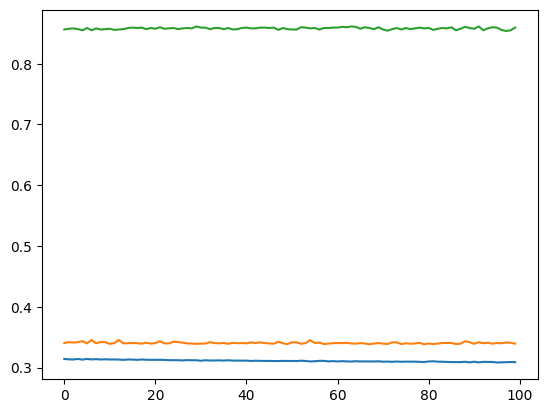

In [70]:
plt.plot(fit_log.history['loss'])
plt.plot(fit_log.history['val_loss'])
plt.plot(fit_log.history['val_accuracy'])

In [58]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [59]:
y_pred = np.where(y_log>0.5,1,0)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858